In [1]:
# import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

In [2]:
# load the data set
rum = pd.read_csv('Data/rum.csv')
rum.head()

,ID,Link,Name,Ids,Distillery,Brand,Country,Distillation,Raw_Material,Age,...,Number_Reviews,Number_Favorited,Smell_Notes,Taste_Notes,Finish_Notes,Number_Closed,Number_Opened,Number_Emptied,Open_Rate,Description
0,1,https://www.rum-x.com/rums/1/maison-ferrand-we...,maison-ferrand-west-indies-plantation-extra-ol...,rx1,west indies,plantation,barbados,pot and column still,molasses,10 years - 15 years,...,954.0,43.0,"['vanilla', 'coconut', 'caramel', 'sweet', 'tr...","['vanilla', 'sweet', 'caramel', 'coconut', 'ba...","['vanilla', 'sweet', 'caramel', 'coconut', 'ca...",1998.0,704.0,461.0,0.2226,discover the rich and indulgent flavors of pla...
1,2,https://www.rum-x.com/rums/2/bleeding-heart-ru...,bleeding-heart-rum-company-don-papa-rum,rx2,bleeding heart rum company,don papa,philippines,column still,molasses,7 years,...,630.0,24.0,"['vanilla', 'caramel', 'sweet', 'synthetic', '...","['vanilla', 'sweet', 'caramel', 'orange', 'syn...","['vanilla', 'sweet', 'caramel', 'synthetic', '...",1397.0,494.0,373.0,0.2182,discover the captivating flavors of don papa r...
2,3,https://www.rum-x.com/rums/3/destilerias-unida...,destilerias-unidas-s-a-diplomatico-botucal-res...,rx3,destilerías unidas s. a.,diplomático / botucal,venezuela,pot and column still,sugar cane honey,12 years,...,973.0,25.0,"['vanilla', 'caramel', 'sweet', 'raisin', 'hon...","['sweet', 'caramel', 'vanilla', 'mild', 'sugar...","['sweet', 'caramel', 'vanilla', 'raisin', 'cho...",2290.0,835.0,586.0,0.2250,introducing the diplomático / botucal reserva ...
3,4,https://www.rum-x.com/rums/4/industrias-licore...,industrias-licoreras-de-guatemala-ron-zacapa-s...,rx4,industrias licoreras de guatemala,ron zacapa,guatemala,column still,sugar cane honey,<23 years,...,699.0,26.0,"['caramel', 'woody', 'vanilla', 'honey', 'drie...","['caramel', 'sweet', 'vanilla', 'woody', 'alco...","['spice', 'sweet', 'woody', 'caramel', 'chocol...",1349.0,1340.0,323.0,0.4449,discover the enticing world of guatemalan rum ...
4,5,https://www.rum-x.com/rums/5/kraken-black-spic...,kraken-black-spiced-rum,rx5,NaN,NaN,trinidad,NaN,molasses,2 years,...,525.0,7.0,"['caramel', 'vanilla', 'spice', 'cinnamon', 'c...","['vanilla', 'caramel', 'sweet', 'spice', 'cinn...","['vanilla', 'caramel', 'sweet', 'spice', 'dilu...",1086.0,380.0,296.0,0.2157,discover the enchanting world of kraken black ...


**The data in the analysis was scraped from the rumX website. This is a site that aggregates user reported reviews of rums based on what they paid for the bottle, their tasting notes, a rating, and much more. Naturally, if you are taking time to sign into an online rum app and upload reviews, you are likely a fan of rum and the data represented here should reflect the opinions of enthusiasts more than that of an average drinker. The goal of this project is to try and identify characteristics that drive a rum's price and rating, rum producing countries that provide better value for price offerings, and overall trends of the community. All monetary values are in Euros as rumX is based in the EU.**

In [3]:
# reset any setting changed during testing
sns.reset_defaults()

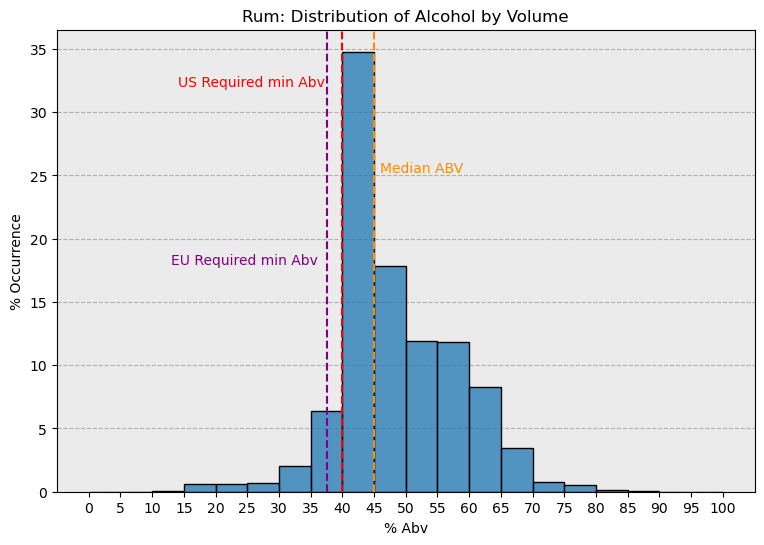

In [4]:
# basic Histogram plots - ABV
plt.figure(figsize=(9,6))

plt.axvline(x=40, color='red', ls='--')
plt.text(14, 32, 'US Required min Abv', color='red')
plt.axvline(x=37.5, color='Purple', ls='--')
plt.text(13, 18, 'EU Required min Abv', color='purple')
plt.axvline(x=rum['Abv'].median(), color='darkorange', ls='--')
plt.text(46, 25.2, 'Median ABV', color='darkorange')

ax = sns.histplot(data = rum, x = 'Abv', stat='percent', binrange=(0,100), binwidth=5)
plt.xlabel("% Abv")
plt.ylabel("% Occurrence")
plt.title("Rum: Distribution of Alcohol by Volume")
plt.xticks(range(0,105,5))

ax.set_axisbelow(True)
ax.grid(axis='y', ls='--')
ax.set_facecolor('#EBEBEB')

plt.show()

**Taking a brief look at the distribution of the reported alcohol by volume (ABV) for every rum, we see a distribution with a slight positive skew. The main bracket, accounting for ~35% of all observations, was the 40-45% ABV range. This makes sense from a producer side of things, knowing that the legal requirement for rum to be sold in the United States is for it to be bottled at a minimum of 40%. This coupled with the fact that selling rum at a lower ABV allows the producer to cut the product that comes off the still at a higher ABV with water, to stretch production and sell more bottles. Curiously, we see values below both the US and EU minimum required ABV. These represent rums from areas that don't market the rum in either market, improperly entered values, or some type of rum-based liqueur. Further exploration might be interesting into these low ABV values.**

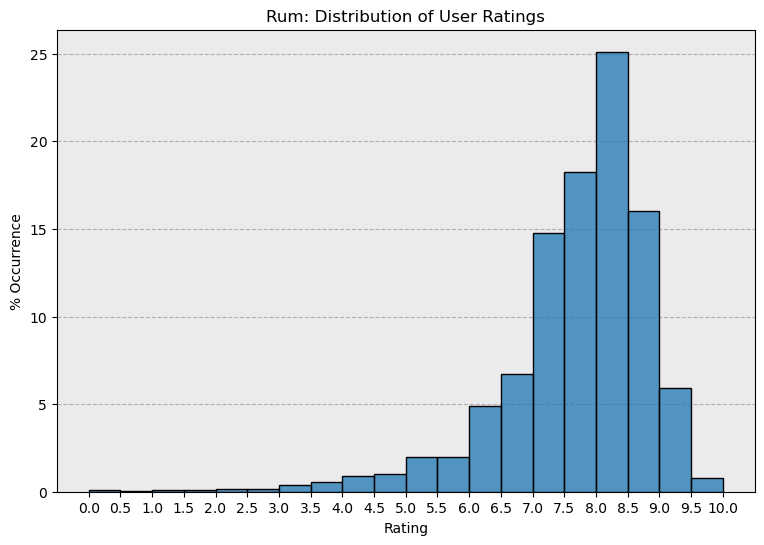

In [5]:
# basic Histogram plots - Rating
plt.figure(figsize=(9,6))

ax = sns.histplot(data = rum, x = 'Rating', binrange=(0,10), binwidth=0.5, stat = 'percent')
plt.xlabel("Rating")
plt.ylabel("% Occurrence")
plt.title("Rum: Distribution of User Ratings")
plt.xticks(np.arange(0,10.5,0.5))

ax.set_axisbelow(True)
ax.grid(axis='y', ls='--')
ax.set_facecolor('#EBEBEB')

plt.show()

**The distribution of user rating for rum in the data set shows a slight negative skew. This makes sense, as users are going to seek out rums that they believe they will enjoy and are less likely to add a review for rums that they didn't like or felt neutral about.**

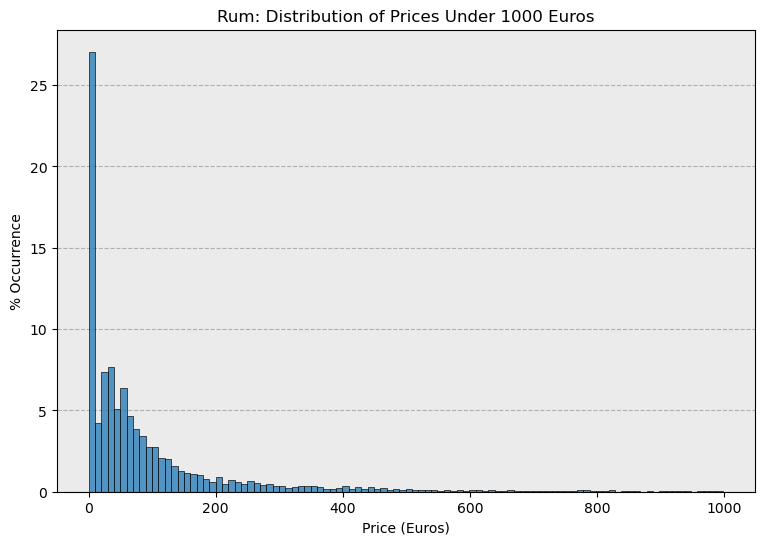

In [6]:
# basic Histogram plots - Price
plt.figure(figsize=(9,6))
ax = sns.histplot(data = rum[rum['Price'] <= 1000], x = 'Price', bins = 100, stat = 'percent')
plt.xlabel("Price (Euros)")
plt.ylabel("% Occurrence")
plt.title("Rum: Distribution of Prices Under 1000 Euros")
ax.set_axisbelow(True)
ax.grid(axis='y', ls='--')
ax.set_facecolor('#EBEBEB')
plt.show()

**Looking at the distribution of prices, there were a few extremely high outliers. The graph above filters rums above 1000 euros. We still see a large amount of extremely low-priced rums. These are likely mistakes and or prices for samples or pours at a bar, rather than full bottles. In further analyses involving price, we will subset rums to those with prices between 10-1000 euros to represent a realistic price range.**

In [7]:
# group by for country
filtered_countries = rum[(rum['Price'] <= 1000) & (rum['Price'] >= 10)].groupby('Country')['Rating'].count().sort_values(ascending=False).head(15).index
country_groupby = rum[(rum['Price'] <= 1000) & (rum['Price'] >= 10)].groupby('Country')[['Price', 'Rating']].mean().dropna().sort_values('Rating', ascending=False)
country_groupby['Ratio'] = country_groupby['Price'] / country_groupby['Rating']
country_groupby[country_groupby.index.isin(filtered_countries)].sort_values('Ratio', ascending=True)

,Price,Rating,Ratio
Country,,,
dominican republic,51.332061,7.170611,7.158674
mauritius,58.574163,7.271770,8.055007
panama,71.148387,7.537097,9.439760
multiple countries,70.218121,7.366443,9.532161
haiti,95.145985,7.866423,12.095203
guadeloupe,114.421053,7.938902,14.412706
reunion,113.228916,7.791165,14.532990
saint lucia,120.936937,8.053153,15.017340
cuba,110.177143,6.861143,16.058133


**To try and find the best value rum producing countries I performed a grouby analysis by countries. Rums were filtered to the 10 - 1000 Euro range, and the top 15 countries with the most occurrences in the data set were also filtered to better reflect general availability. I created a column called 'Ratio' reflecting the average price / average rating to try and find the best values in rum. By this simple metric, rums from the Dominican Republic, Mauritius, and Panama offer the best value. Interestingly, the countries with the highest price also had the highest rating, as well as the ratio. This metric isn't perfect obviously and incorporating the number of reviews to weigh rums that have tons of reviews higher would be an interesting next step to explore.**

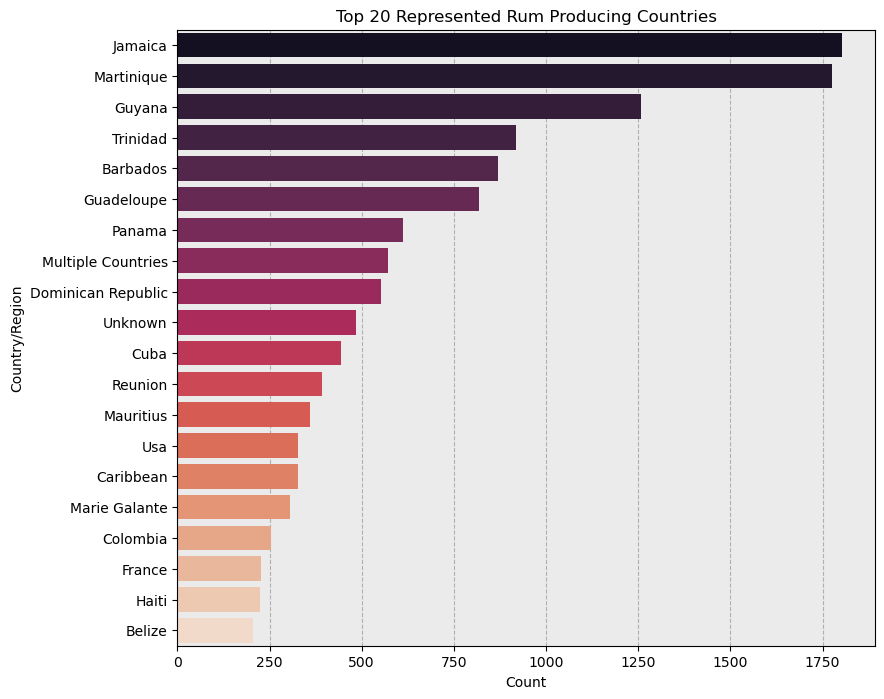

In [8]:
# basic bar chart for country
num_countries = 20

plt.figure(figsize=(9,8))
ax = sns.countplot(data = rum[rum['Country'].isin(list(rum['Country'].value_counts()[0:num_countries].index))],
                   orient = 'x',
                   y = 'Country', 
                   order = rum['Country'].value_counts().index[0:num_countries],
                  palette = 'rocket')
plt.xlabel("Count")
plt.ylabel("Country/Region")
plt.title(f"Top {num_countries} Represented Rum Producing Countries")

ax.set_axisbelow(True)
ax.grid(axis='x', ls='--')
ax.set_facecolor('#EBEBEB')
ax.set_yticklabels([t.title() for t in rum['Country'].value_counts().index[0:num_countries]])

plt.show()

**Jamaica was the country with the most unique rums in the data set, followed closely behind by Martinique. The list is dominated with Caribbean countries (countries that border the Caribbean Sea). Reunion Island is the top country not geographically close to the Caribbean Sea in this data set.**

In [9]:
# group by for distillation method
dist_group = rum[(rum['Price'] <= 1000) & (rum['Price'] >= 10)].groupby('Distillation')[['Price', 'Rating']].mean().dropna()
dist_group['Ratio'] = dist_group['Price'] / dist_group['Rating']
dist_group.sort_values('Ratio', ascending=True)

,Price,Rating,Ratio
Distillation,,,
pot and column still,104.682171,7.684302,13.622859
column still,109.817888,7.571941,14.503269
creole column,119.902200,8.075306,14.848008
vendome pot still,151.307692,8.438462,17.930720
savalle still,149.162162,8.132432,18.341642
double retort pot still,154.466667,8.386667,18.418124
double wooden pot still,153.078125,8.157813,18.764604
pot still,156.117647,8.044870,19.405863
john dore pot still,185.318182,8.268182,22.413414


**The two main types of stills used in spirit distillation are the column and pot stills. Blending distillate from both is also common practice. These other named stills are either rare types, or specifically named stills from one distillery. My assumption was that the three most common types would have the best ratio, with the thought being that these rare or named stills would add a premium to the price. Interestingly, pot still rums have a worse ratio compared to those of columns, or blends.**

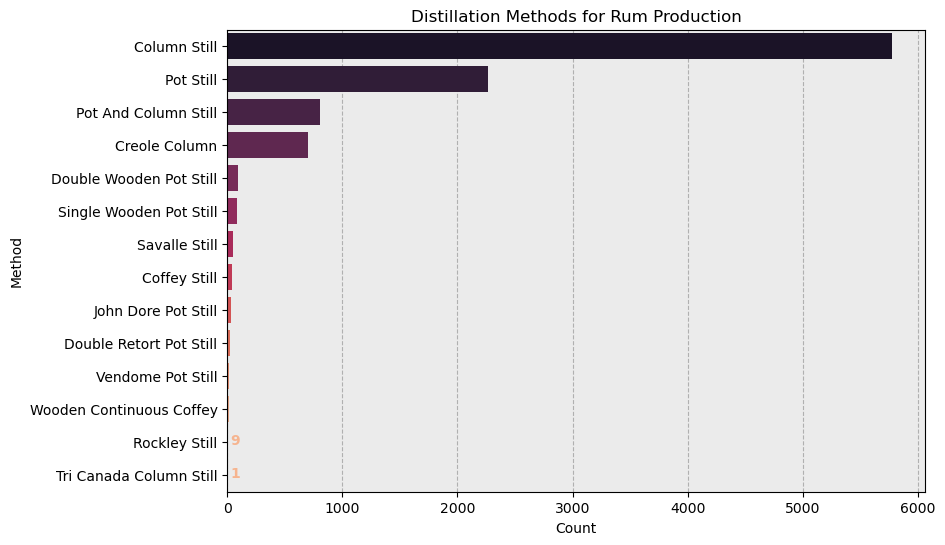

In [10]:
# basic bar chart for Distillation Methods
num_methods = 14

plt.figure(figsize=(9,6))
ax = sns.countplot(data = rum[rum['Distillation'].isin(list(rum['Distillation'].value_counts()[0:num_methods].index))],
                   orient = 'x',
                   y = 'Distillation', 
                   order = rum['Distillation'].value_counts().index[0:num_methods],
                  palette = 'rocket')
plt.xlabel("Count")
plt.ylabel("Method")
plt.title(f"Distillation Methods for Rum Production")
plt.text(25, 12.08, '9', color = f'{sns.color_palette("rocket").as_hex()[5]}', fontweight='bold' )
plt.text(25, 13.08, '1', color = f'{sns.color_palette("rocket").as_hex()[5]}', fontweight='bold' )
ax.set_axisbelow(True)
ax.grid(axis='x', ls='--')
ax.set_facecolor('#EBEBEB')
ax.set_yticklabels([t.title() for t in rum['Distillation'].value_counts().index[0:num_methods]])

plt.show()


**As mentioned above, the three main distillation methods are column and pot stills, with blending the two being common as well.**

In [11]:
# group by for raw material
raw_group = rum[(rum['Price'] <= 1000) & (rum['Price'] >= 10)].groupby('Raw_Material')[['Price', 'Rating']].mean()
raw_group['Ratio'] = raw_group['Price'] / raw_group['Rating']
raw_group.sort_values('Ratio', ascending=True)

,Price,Rating,Ratio
Raw_Material,,,
molasses and sugar cane juice,99.337349,7.583133,13.099778
sugar cane honey,103.628571,7.458571,13.893890
sugar cane juice,120.426685,7.862842,15.315924
molasses,139.415800,7.749980,17.989182


**Amongst the different raw materials for rum making, there is a much smaller range of price to rating ratios. However, blends of molasses and sugar cane juice provides the best value, and among the two main raw materials, sugar cane juice provided more value than molasses.**

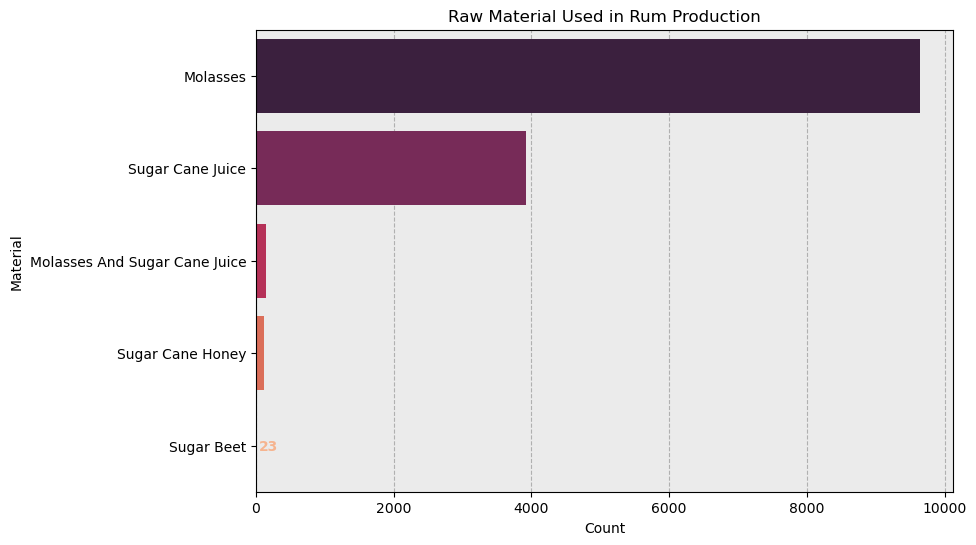

In [12]:
# basic bar chart for Raw Materials
num_materials = 5

plt.figure(figsize=(9,6))

ax = sns.countplot(data = rum[rum['Raw_Material'].isin(list(rum['Raw_Material'].value_counts()[0:num_materials].index))],
                   orient = 'x',
                   y = 'Raw_Material', 
                   order = rum['Raw_Material'].value_counts().index[0:num_materials],
                  palette = 'rocket')

plt.xlabel("Count")
plt.ylabel("Material")
plt.title(f"Raw Material Used in Rum Production")
plt.text(50, 4.055, '23', color = f'{sns.color_palette("rocket").as_hex()[5]}', fontweight='bold' )
ax.set_axisbelow(True)
ax.grid(axis='x', ls='--')
ax.set_facecolor('#EBEBEB')
ax.set_yticklabels([t.title() for t in rum['Raw_Material'].value_counts().index[0:num_materials]])

plt.show()

**Again, molasses and sugar cane juice are the two predominant raw materials. We see sugar beet also represented here, but not in the group by chart. This must be because all sugar beet rums fell outside of the 10 to 1000 euro price range.**

In [13]:
# multiple group by 
country_filters = ['jamaica', 'martinique', 'barbados', 'guyana', 'trinidad']
dist_filters = ['column still', 'pot still', 'pot and column still']
filter_group = rum[rum['Country'].isin(country_filters) & rum['Distillation'].isin(dist_filters) & (rum['Price'] >= 10) & (rum['Price'] <= 1000)].groupby(['Country', 'Distillation'])[['Price', 'Rating']].mean()
filter_group['Ratio'] = filter_group['Price'] / filter_group['Rating']
filter_group

Price    Rating      Ratio
Country    Distillation                                         
barbados   column still           78.714286  7.538095  10.442198
           pot and column still  140.288793  8.025431  17.480531
           pot still             191.235294  8.136765  23.502621
guyana     column still          162.333333  8.031373  20.212402
           pot and column still   74.133333  7.026667  10.550285
           pot still             207.924658  8.244521  25.219739
jamaica    column still          203.125000  8.146875  24.932873
           pot and column still  125.322581  7.416129  16.898652
           pot still             181.573466  8.215407  22.101580
martinique column still          159.438538  7.915947  20.141436
           pot and column still   62.000000  7.809091   7.939464
           pot still              54.250000  8.125000   6.676923
trinidad   column still          204.486726  8.034513  25.451041
           pot and column still   58.571429  7.800000   7.509158
           pot still             174.558824  8.141176  21.441474

**I wanted to take the group by tables one step deeper and look at the top 5 countries by the top 3 distillation methods to look for value. Looking at this combination of factors, pot still Martinique rum is the best value and will be on my radar as my next purchase.**

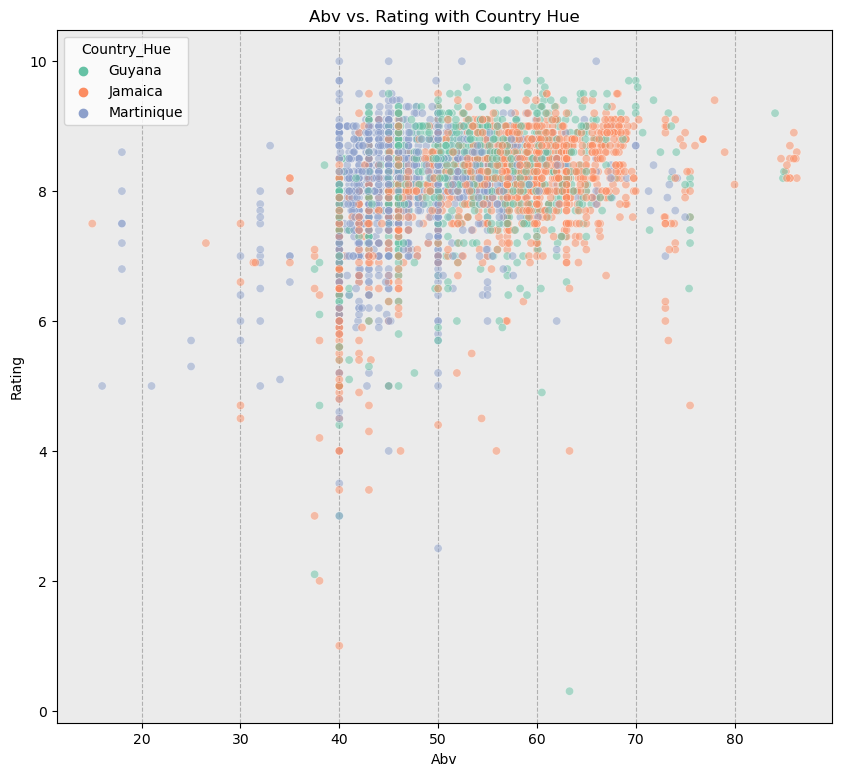

In [14]:
# scatter plots with hues
rum['Country_Hue'] = np.where(rum['Country'] == 'jamaica', 'Jamaica', 
                              np.where(rum['Country'] == 'martinique', 'Martinique', 
                                       np.where(rum['Country'] == 'guyana', 'Guyana', 'Other')))
x_ax = 'Abv'
y_ax = 'Rating'

plt.figure(figsize=(10,9))
ax = sns.scatterplot(data = rum[rum['Country_Hue'] != 'Other'], x = x_ax, y = y_ax, hue='Country_Hue', alpha = 0.5, palette = 'Set2')
plt.xlabel(f"{x_ax}")
plt.ylabel(f"{y_ax}")
plt.title(f"{x_ax} vs. {y_ax} with Country Hue")
ax.set_axisbelow(True)
ax.grid(axis='x', ls='--')
ax.set_facecolor('#EBEBEB')
sns.move_legend(ax, "upper left")
plt.show()
rum.drop(columns=['Country_Hue'] , inplace=True)

**Plotting ABV vs Rating with a hue on my 3 countries of interest, we see a few interesting things. There is a small group of Jamaican rums released at the ~90% ABV range. This is insanely high and kind of unusual. We see our line of rums at the 40% ABV cutoff. In general, there appears to be a few clusters of Martinique rums in the 40-50 ABV range, Guyanese 45-55 ABV range, and Jamaican rums in the 50-70 ABV range.**

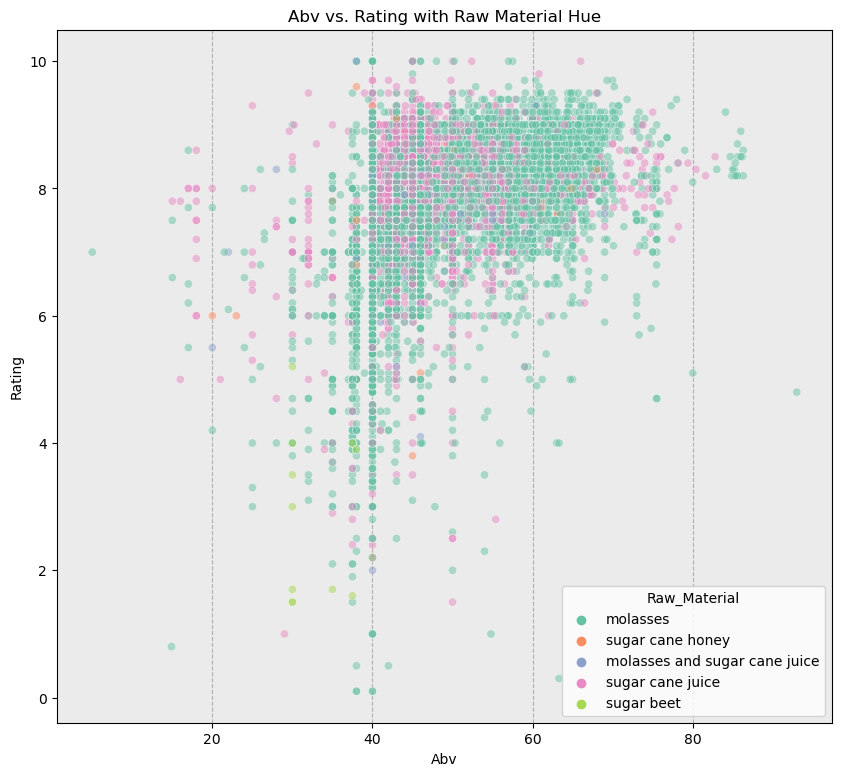

In [15]:
# scatter plots with hues
x_ax = 'Abv'
y_ax = 'Rating'

plt.figure(figsize=(10,9))
ax = sns.scatterplot(data = rum, x = x_ax, y = y_ax, hue='Raw_Material', alpha = 0.5, palette = 'Set2')
plt.xlabel(f"{x_ax}")
plt.ylabel(f"{y_ax}")
plt.title(f"{x_ax} vs. {y_ax} with Raw Material Hue")
ax.set_axisbelow(True)
ax.grid(axis='x', ls='--')
ax.set_facecolor('#EBEBEB')
sns.move_legend(ax, "lower right")
plt.show()

**I see no decernable big picture trends from this plot. One intersting thing I see is that the sugar beet rums all are below the 40 ABV mark**

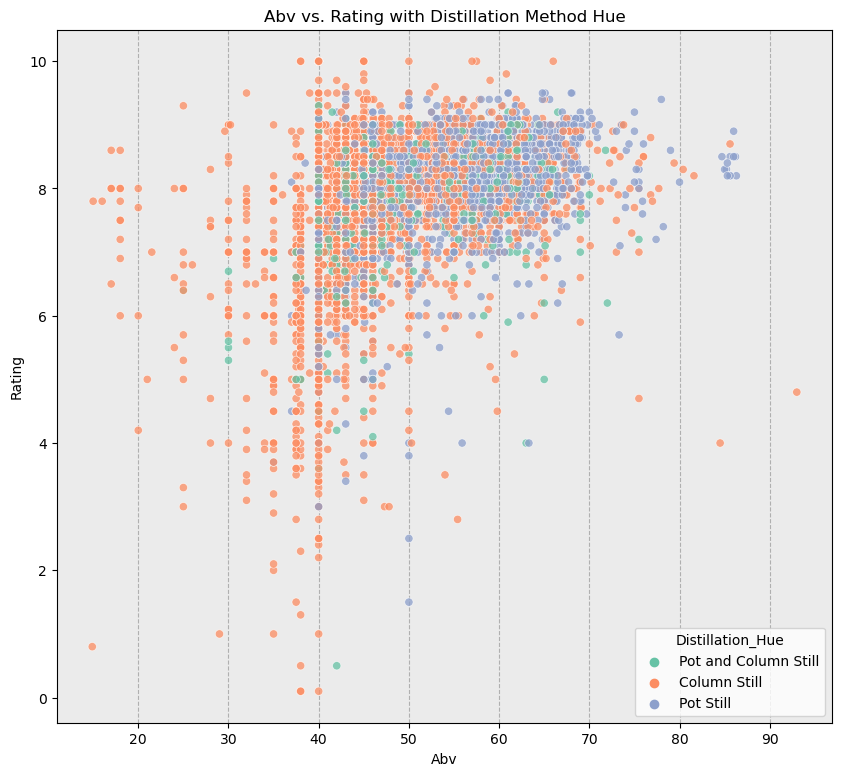

In [16]:
# scatter plots with hues
rum['Distillation_Hue'] = np.where(rum['Distillation'] == 'pot still', 'Pot Still', 
                                   np.where(rum['Distillation'] == 'column still', 'Column Still', 
                                            np.where(rum['Distillation'] == 'pot and column still', 'Pot and Column Still', 'Other')))
x_ax = 'Abv'
y_ax = 'Rating'

plt.figure(figsize=(10,9))
ax = sns.scatterplot(data = rum[rum['Distillation_Hue'] != 'Other'], x = x_ax, y = y_ax, hue='Distillation_Hue', alpha = 0.75, palette = 'Set2')
plt.xlabel(f"{x_ax}")
plt.ylabel(f"{y_ax}")
plt.title(f"{x_ax} vs. {y_ax} with Distillation Method Hue")
ax.set_axisbelow(True)
ax.grid(axis='x', ls='--')
ax.set_facecolor('#EBEBEB')
sns.move_legend(ax, "lower right")
plt.show()
rum.drop(columns=['Distillation_Hue'] , inplace=True)

**From this, it seems that pot still rums tend be to slightly higher in ABV than coulmn still rums.**

In [17]:
# looking at price, subsetting to below 1000 euros
rum_filtered = pd.read_csv('Data/rum.csv')
rum_filtered = rum_filtered[rum_filtered['Price'] <= 1000]
rum_filtered = rum_filtered[rum_filtered['Price'] >= 10]
rum_filtered = rum_filtered[rum_filtered['Number_Reviews'] >= 10]

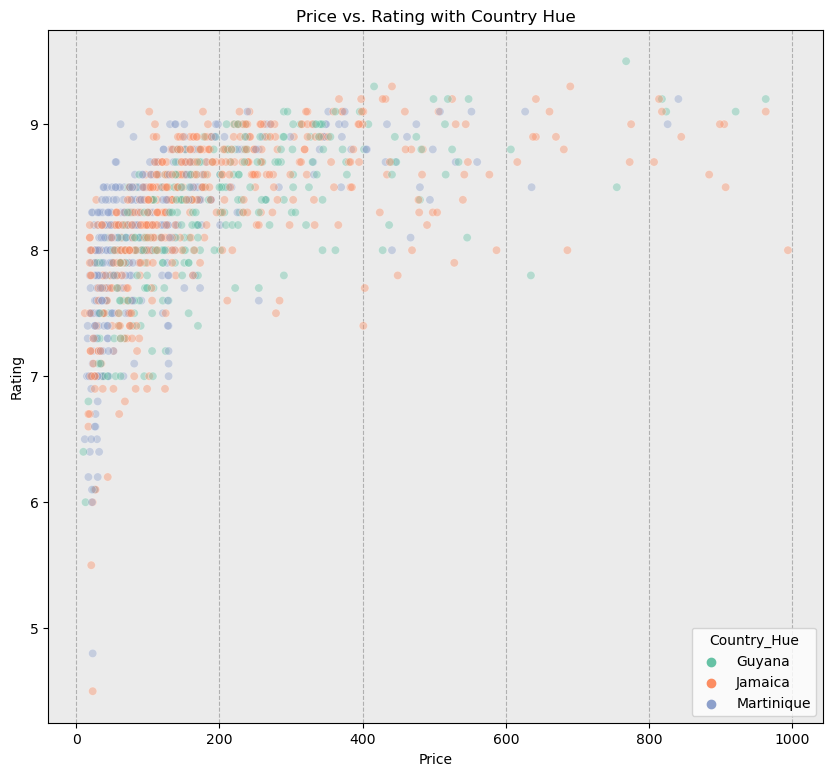

In [18]:
# scatter plots with hues
rum_filtered['Country_Hue'] = np.where(rum_filtered['Country'] == 'jamaica', 'Jamaica', 
                                           np.where(rum_filtered['Country'] == 'martinique', 'Martinique', 
                                                    np.where(rum_filtered['Country'] == 'guyana', 'Guyana', 'Other')))
x_ax = 'Price'
y_ax = 'Rating'

plt.figure(figsize=(10,9))
ax = sns.scatterplot(data = rum_filtered[rum_filtered['Country_Hue'] != 'Other'], x = x_ax, y = y_ax, hue='Country_Hue', alpha = 0.4, palette = 'Set2')
plt.xlabel(f"{x_ax}")
plt.ylabel(f"{y_ax}")
plt.title(f"{x_ax} vs. {y_ax} with Country Hue")
ax.set_axisbelow(True)
ax.grid(axis='x', ls='--')
ax.set_facecolor('#EBEBEB')
sns.move_legend(ax, "lower right")
plt.show()
rum_filtered.drop(columns=['Country_Hue'] , inplace=True)

**Again, not much insight here, other that it appears higher rums have higher ratings. However, lucky for the consumer this trend seems to have diminishing values that cap off around 100 euros. There are plenty of highly rated rums at lower costs.**

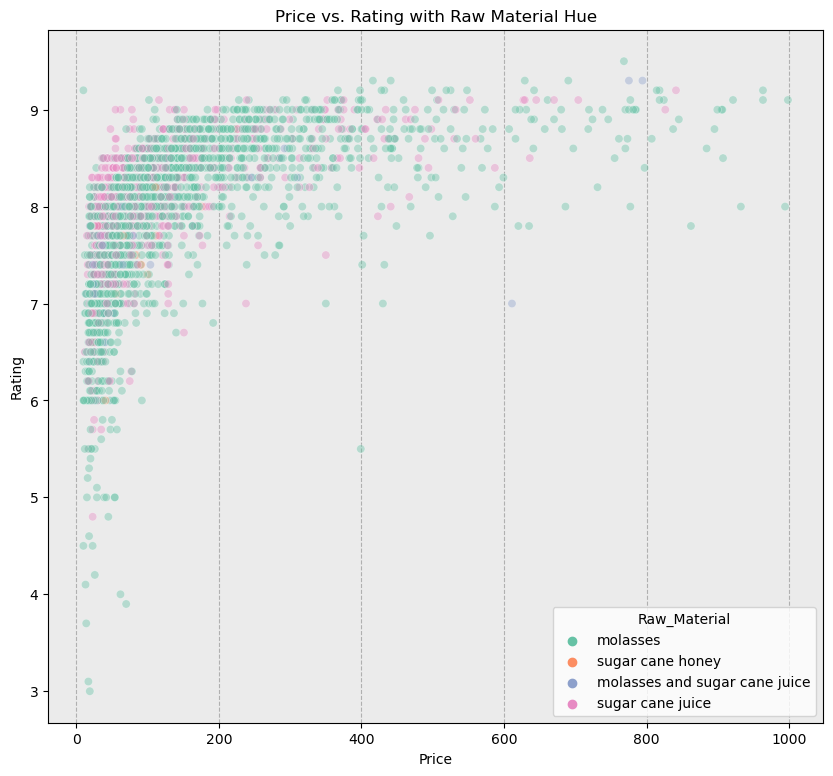

In [19]:
# scatter plots with hues
x_ax = 'Price'
y_ax = 'Rating'

plt.figure(figsize=(10,9))
ax = sns.scatterplot(data = rum_filtered, x = x_ax, y = y_ax, hue='Raw_Material', alpha = 0.4, palette = 'Set2')
plt.xlabel(f"{x_ax}")
plt.ylabel(f"{y_ax}")
plt.title(f"{x_ax} vs. {y_ax} with Raw Material Hue")
ax.set_axisbelow(True)
ax.grid(axis='x', ls='--')
ax.set_facecolor('#EBEBEB')
sns.move_legend(ax, "lower right")
plt.show()

**Included for completeness.**

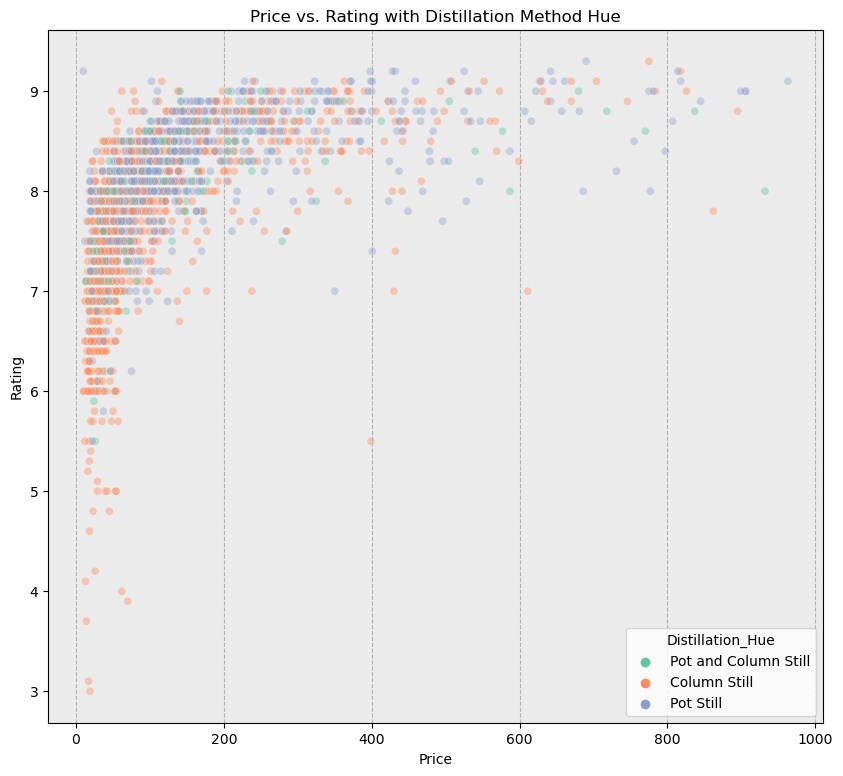

In [20]:
# scatter plots with hues
rum_filtered['Distillation_Hue'] = np.where(rum_filtered['Distillation'] == 'pot still', 'Pot Still', 
                                   np.where(rum_filtered['Distillation'] == 'column still', 'Column Still', 
                                            np.where(rum_filtered['Distillation'] == 'pot and column still', 'Pot and Column Still', 'Other')))
x_ax = 'Price'
y_ax = 'Rating'

plt.figure(figsize=(10,9))
ax = sns.scatterplot(data = rum_filtered[rum_filtered['Distillation_Hue'] != 'Other'], x = x_ax, y = y_ax, hue='Distillation_Hue', alpha = 0.4, palette = 'Set2')
plt.xlabel(f"{x_ax}")
plt.ylabel(f"{y_ax}")
plt.title(f"{x_ax} vs. {y_ax} with Distillation Method Hue")
ax.set_axisbelow(True)
ax.grid(axis='x', ls='--')
ax.set_facecolor('#EBEBEB')
sns.move_legend(ax, "lower right")
plt.show()
rum_filtered.drop(columns=['Distillation_Hue'] , inplace=True)

**Included for completeness.**

In [21]:
# testing co-occurence matrix, convert lists embedded in strings into lists
rum_tasting = pd.read_csv('Data/rum.csv')
rum_tasting = rum_tasting[~pd.isna(rum_tasting['Taste_Notes'])]
rum_tasting['Taste_Notes'] = [eval(l) for l in rum_tasting['Taste_Notes']]

In [22]:
# counting all tasting notes and their counts
tastes = defaultdict(int)
num_tastes = 18

for l in rum_tasting['Taste_Notes']:
    for t in l:
        tastes[t] += 1
        
tastes = dict(tastes)
tastes = {k:v for k,v in sorted(tastes.items(), key = lambda x:x[1], reverse=True)}
topX = list(tastes.keys())[0:num_tastes] + ['vegetal', 'herbal']

In [23]:
# https://stackoverflow.com/questions/53850559/construct-co-occurrence-matrix-from-a-list-of-list-in-python
u = (pd.get_dummies(pd.DataFrame(list(rum_tasting['Taste_Notes'])), prefix='', prefix_sep='')
       .groupby(level=0, axis=1)
       .sum())
v = u.T.dot(u)
v.values[(np.r_[:len(v)], ) * 2] = 0

In [24]:
# Filter v into a reasonable amount of features
v_topX = v.loc[v.index.isin(topX), v.columns.isin(topX)]
v_topX

,alcoholic,banana,barrel,caramel,dark chocolate,dried fruit,dry,fruity,herbal,oak,peppery,roasted,spice,spicy,sugarcane,sweet,tropical fruit,vanilla,vegetal,woody
alcoholic,0,90,123,200,78,116,99,184,46,104,127,112,154,220,81,1,130,84,57,113
banana,90,0,92,172,67,74,99,148,40,135,101,122,139,151,53,203,22,106,36,80
barrel,123,92,0,248,103,174,102,150,56,140,100,187,160,191,42,182,141,132,36,91
caramel,200,172,248,0,27,107,122,28,67,84,167,42,50,94,63,49,231,154,41,27
dark chocolate,78,67,103,27,0,194,59,122,27,159,57,154,119,146,38,4,94,164,21,150
dried fruit,116,74,174,107,194,0,146,189,54,217,136,17,7,239,78,18,133,73,62,207
dry,99,99,102,122,59,146,0,129,44,149,136,98,146,173,105,130,125,31,78,127
fruity,184,148,150,28,122,189,129,0,72,159,196,144,35,85,205,165,229,23,166,156
herbal,46,40,56,67,27,54,44,72,0,43,71,54,63,109,78,70,67,123,66,182
oak,104,135,140,84,159,217,149,159,43,0,126,242,167,213,70,6,134,101,38,118


**Example output of a tasting note co-occurence matrix used for heatmaps.**

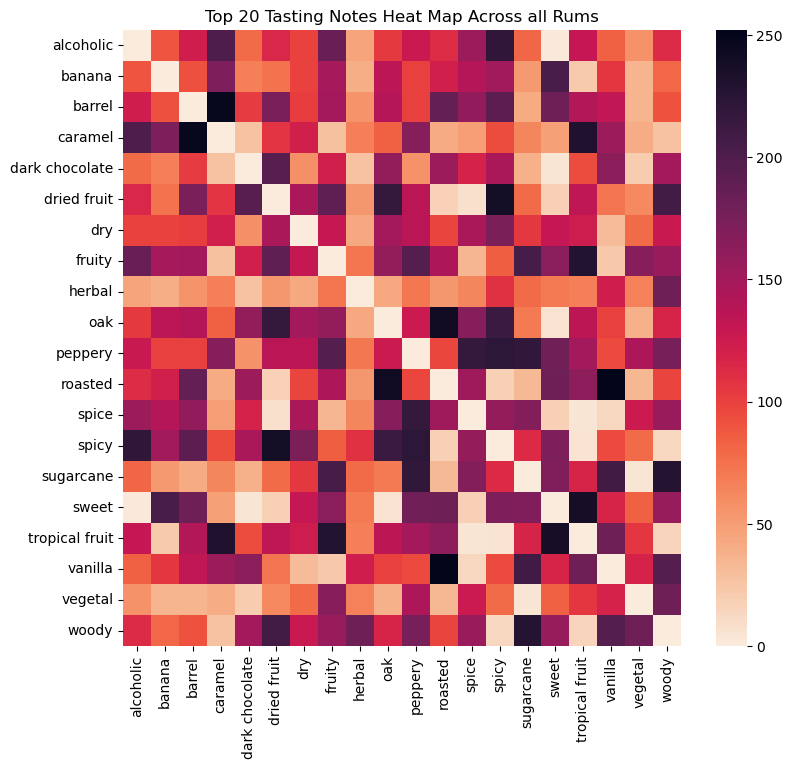

In [25]:
# lower triangular heat map
plt.figure(figsize=(9,8))
sns.heatmap(v_topX, cmap = 'rocket_r')
plt.title(f"Top {num_tastes + 2} Tasting Notes Heat Map Across all Rums")
plt.show()

**Looking at the heat map for the 25 most common flavor notes across all rums we see a few themes in flavor combos.**

In [26]:
# getting heatmaps for 4 select countries
jamaica_tasting = rum_tasting[rum_tasting['Country'] == 'jamaica']
martinique_tasting = rum_tasting[rum_tasting['Country'] == 'martinique']
guyana_tasting = rum_tasting[rum_tasting['Country'] == 'guyana']
barbados_tasting = rum_tasting[rum_tasting['Country'] == 'barbados']

# jamaica
u_J = (pd.get_dummies(pd.DataFrame(list(jamaica_tasting['Taste_Notes'])), prefix='', prefix_sep='')
       .groupby(level=0, axis=1)
       .sum())
v_J = u_J.T.dot(u_J)
v_J.values[(np.r_[:len(v_J)], ) * 2] = 0
j_topX = v_J.loc[v_J.index.isin(topX), v_J.columns.isin(topX)]

# martinique
u_M = (pd.get_dummies(pd.DataFrame(list(martinique_tasting['Taste_Notes'])), prefix='', prefix_sep='')
       .groupby(level=0, axis=1)
       .sum())
v_M = u_M.T.dot(u_M)
v_M.values[(np.r_[:len(v_M)], ) * 2] = 0
m_topX = v_M.loc[v_M.index.isin(topX), v_M.columns.isin(topX)]

# guyana
u_G = (pd.get_dummies(pd.DataFrame(list(guyana_tasting['Taste_Notes'])), prefix='', prefix_sep='')
       .groupby(level=0, axis=1)
       .sum())
v_G = u_G.T.dot(u_G)
v_G.values[(np.r_[:len(v_G)], ) * 2] = 0
g_topX = v_G.loc[v_G.index.isin(topX), v_G.columns.isin(topX)]

# barbados
u_B = (pd.get_dummies(pd.DataFrame(list(barbados_tasting['Taste_Notes'])), prefix='', prefix_sep='')
       .groupby(level=0, axis=1)
       .sum())
v_B = u_B.T.dot(u_B)
v_B.values[(np.r_[:len(v_B)], ) * 2] = 0
b_topX = v_B.loc[v_B.index.isin(topX), v_B.columns.isin(topX)]

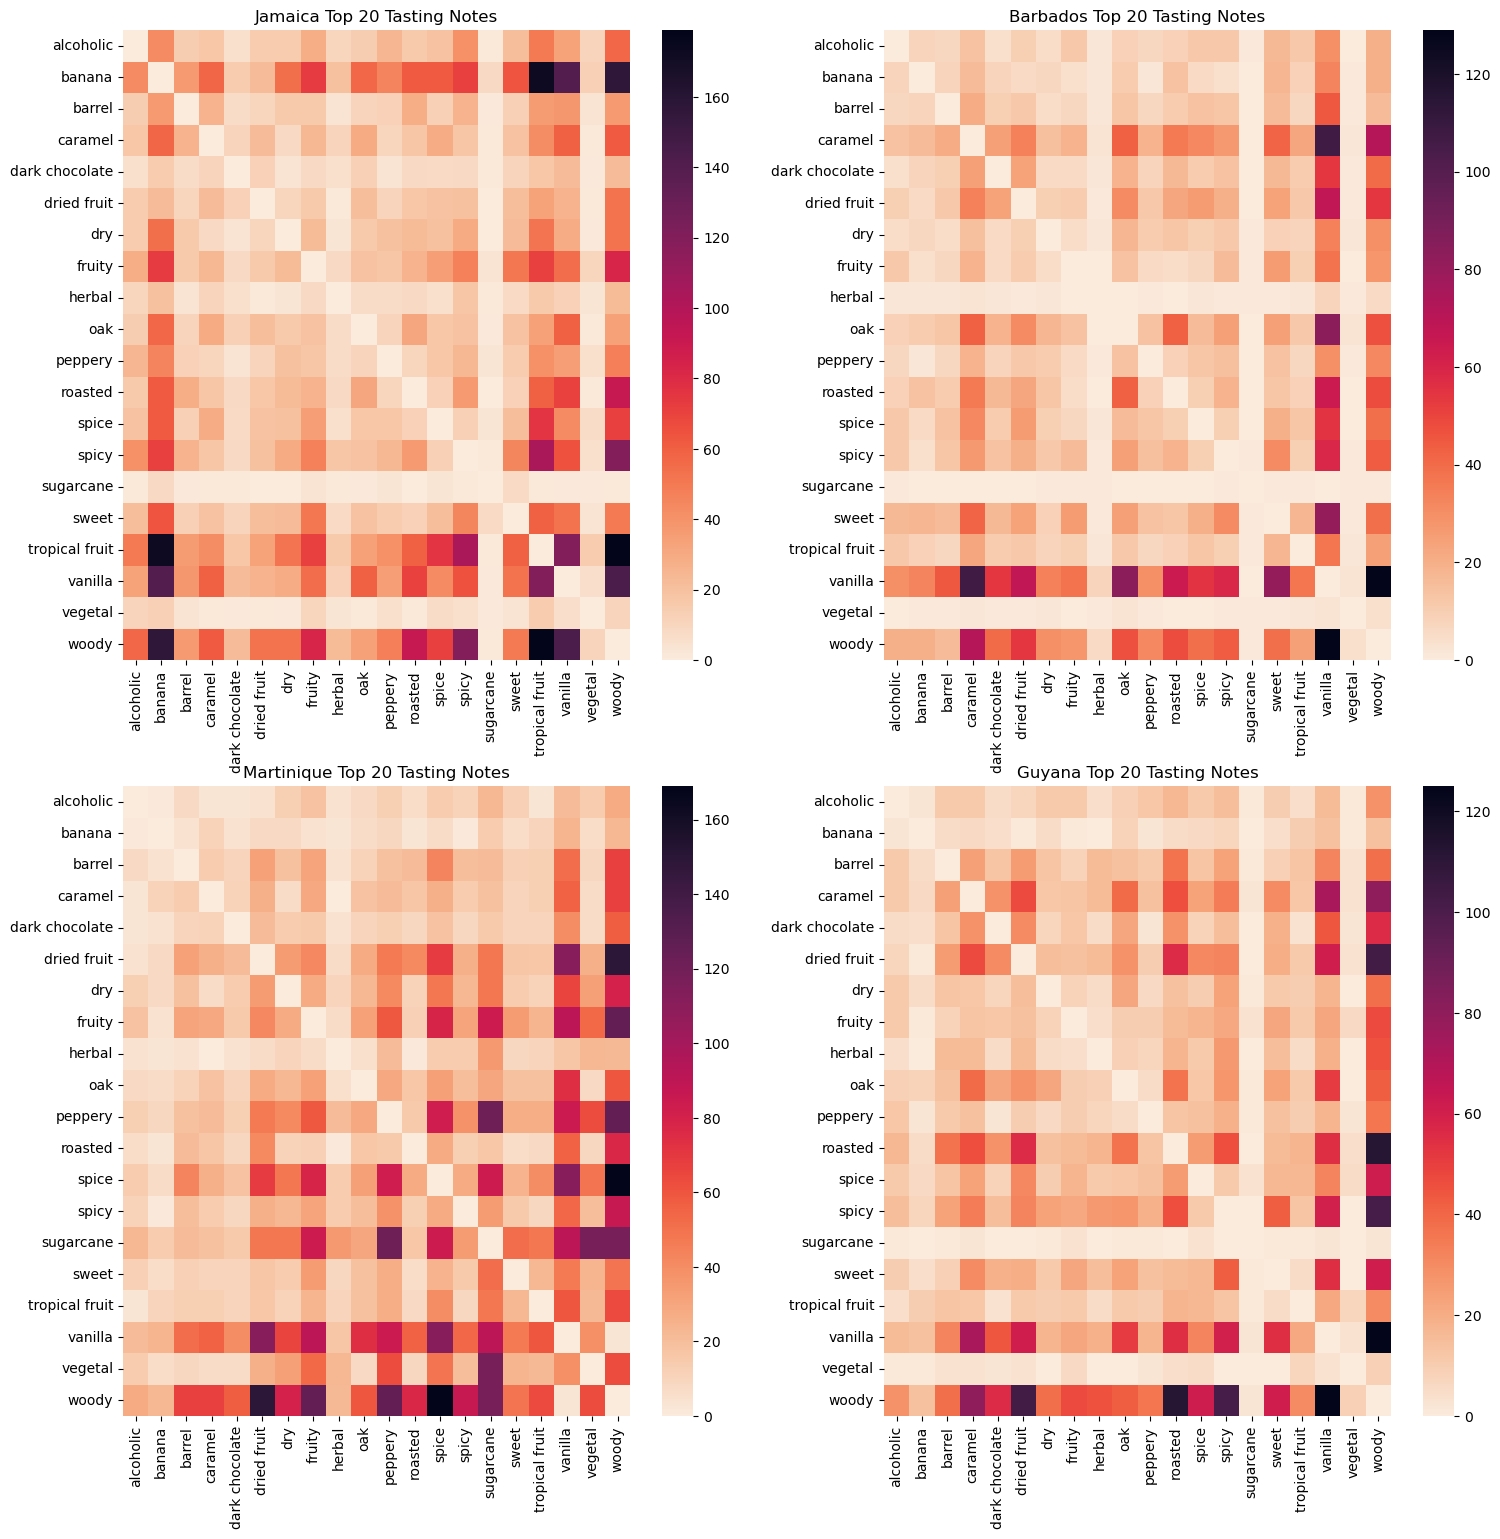

In [27]:
#
fig, axes = plt.subplots(2, 2, figsize=(18, 18))

# Jamaica
sns.heatmap(j_topX, ax=axes[0,0], cmap = 'rocket_r')
axes[0,0].set_title(f'Jamaica Top {num_tastes + 2} Tasting Notes')

# Barbados
sns.heatmap(b_topX, ax=axes[0,1], cmap = 'rocket_r')
axes[0,1].set_title(f'Barbados Top {num_tastes + 2} Tasting Notes')

# Martinique
sns.heatmap(m_topX, ax=axes[1,0], cmap = 'rocket_r')
axes[1,0].set_title(f'Martinique Top {num_tastes + 2} Tasting Notes')

# Guyana
sns.heatmap(g_topX, ax=axes[1,1], cmap = 'rocket_r')
axes[1,1].set_title(f'Guyana Top {num_tastes + 2} Tasting Notes')

plt.show()

**Jamaican rums tend to be tropical fruit and wood, with a bit of spice. Barbadian rums are vanilla and wood driven. Martinique rums are dried fruit and sugarcane and vegetal. Guyanese rums tend to be vanilla and woody and roasted.**

In [28]:
# building a custom function to tastes

def heatMap(country='jamaica', number_notes=20, attr_='Taste_Notes'):
    
    assert country in list(rum['Country'].unique()), f'{country} is not a valid country'
    assert attr_ in ['Taste_Notes', 'Smell_Notes', 'Finish_Notes'], f"Must choose between 'Taste_Notes', 'Smell_Notes', 'Finish_Notes'"
    assert number_notes >= 5 and number_notes <= 30, 'Pick a number between 5 and 30 inclusive'
    
    # load tasting df
    rum_tasting = pd.read_csv('Data/rum.csv')
    
    # subset df based on attr_
    rum_tasting = rum_tasting[~pd.isna(rum_tasting[attr_])]
    rum_tasting[attr_] = [eval(l) for l in rum_tasting[attr_]]
    
    # get top notes for specific country
    country_tasting = rum_tasting[rum_tasting['Country'] == country]
    
    # get the top notes for chosen country
    tastes = defaultdict(int)
    num_tastes = number_notes

    for l in country_tasting[attr_]:
        for t in l:
            tastes[t] += 1

    tastes = dict(tastes)
    tastes = {k:v for k,v in sorted(tastes.items(), key = lambda x:x[1], reverse=True)}
    topX = list(tastes.keys())[0:num_tastes]
   
    u = (pd.get_dummies(pd.DataFrame(list(rum_tasting[attr_])), prefix='', prefix_sep='')
           .groupby(level=0, axis=1)
           .sum())
    v = u.T.dot(u)
    v.values[(np.r_[:len(v)], ) * 2] = 0
    
    v_topX = v.loc[v.index.isin(topX), v.columns.isin(topX)]
    
    
    
    u_X = (pd.get_dummies(pd.DataFrame(list(country_tasting[attr_])), prefix='', prefix_sep='')
       .groupby(level=0, axis=1)
       .sum())
    v_X = u_X.T.dot(u_X)
    v_X.values[(np.r_[:len(v_X)], ) * 2] = 0
    X_topX = v_X.loc[v_X.index.isin(topX), v_X.columns.isin(topX)]
    
    fig, axes = plt.subplots(1, 2, figsize=(18, 7))

    # plot the specific country data
    sns.heatmap(X_topX, ax=axes[0], cmap = 'rocket_r')
    axes[0].set_title(f'Top {number_notes} {attr_}: {country.title()}')
            
    # plot all rum data
    sns.heatmap(v_topX, ax=axes[1], cmap = 'rocket_r')
    axes[1].set_title(f'Top {number_notes} {attr_}: All Rums')
    
    

    
    plt.show()
    
    
    

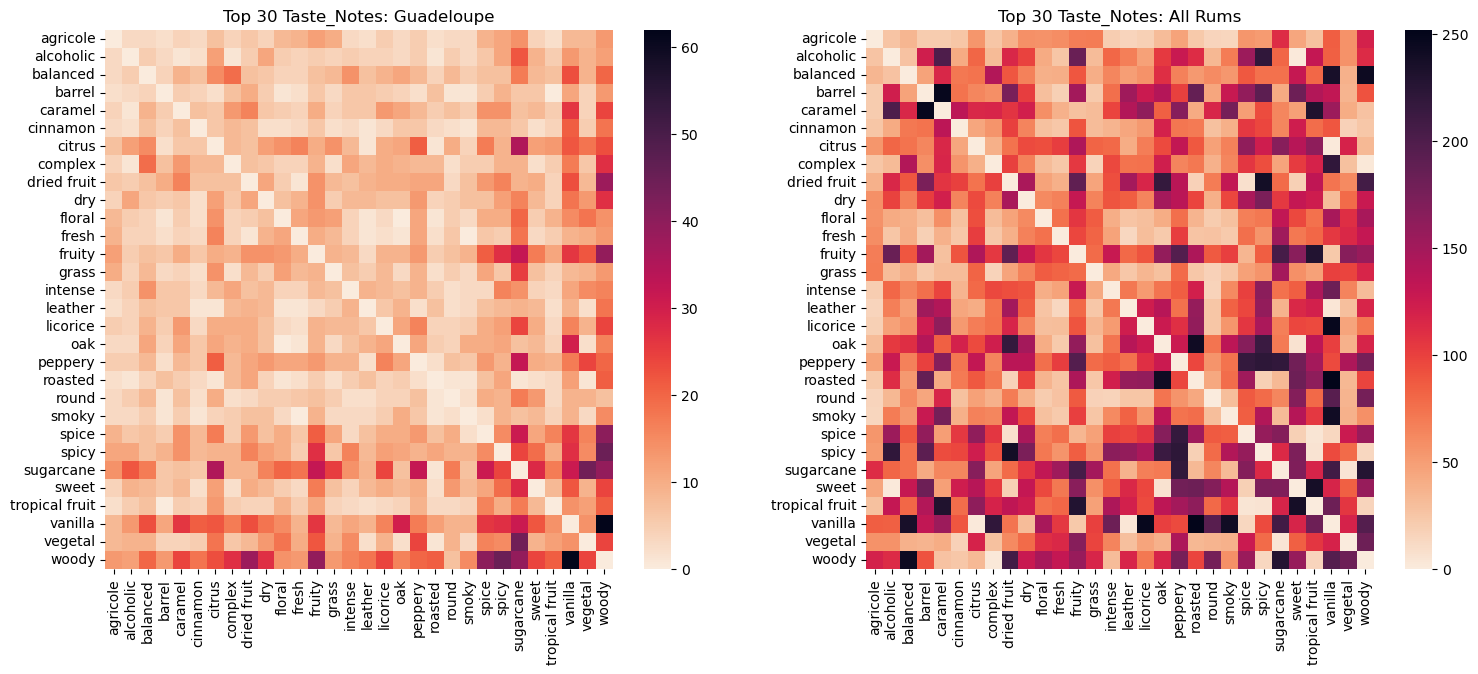

In [29]:
heatMap(country='guadeloupe', attr_='Taste_Notes', number_notes=30)

**Built a custom function to compare a given country, number of notes, and the type of note (smell or taste) for a rum compared to the whole set.**

In [10]:
test = 